In [2]:
import sys, os
sys.path.append(os.getcwd())
print(sys.path)

['/Users/chrisg/miniconda3/envs/drlnd/lib/python36.zip', '/Users/chrisg/miniconda3/envs/drlnd/lib/python3.6', '/Users/chrisg/miniconda3/envs/drlnd/lib/python3.6/lib-dynload', '', '/Users/chrisg/miniconda3/envs/drlnd/lib/python3.6/site-packages', '/Users/chrisg/miniconda3/envs/drlnd/lib/python3.6/site-packages/IPython/extensions', '/Users/chrisg/.ipython', '/Users/chrisg/dev/deep-reinforcement-navigation']


In [3]:
from unityagents import UnityEnvironment
import numpy as np

In [4]:
env = UnityEnvironment(file_name="Banana.app", no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
brain

In [6]:
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

In [7]:
from model import QNetwork

qnetwork_trial = QNetwork(state_size, action_size, 0)
qnetwork_trial

QNetwork(
  (fc1): Linear(in_features=37, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=4, bias=True)
)

In [8]:
from dqn_agent import Agent

agent = Agent(state_size, action_size, seed=0)

Episode 100	Average Score: 0.69
Episode 200	Average Score: 3.71
Episode 300	Average Score: 6.75
Episode 400	Average Score: 9.70
Episode 500	Average Score: 12.54
Episode 600	Average Score: 14.89
Episode 700	Average Score: 15.27
Episode 800	Average Score: 14.69
Episode 900	Average Score: 15.61
Episode 1000	Average Score: 15.62
Episode 1100	Average Score: 15.64
Episode 1200	Average Score: 15.89
Episode 1300	Average Score: 14.91
Episode 1400	Average Score: 16.26
Episode 1500	Average Score: 15.84
Episode 1600	Average Score: 15.40
Episode 1700	Average Score: 15.65
Episode 1800	Average Score: 16.01
Episode 1900	Average Score: 16.50
Episode 2000	Average Score: 16.23


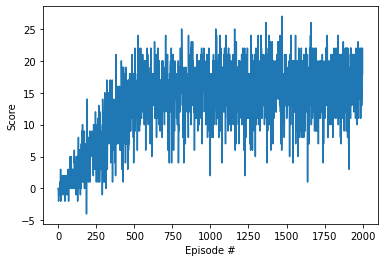

In [9]:
from collections import deque
import matplotlib.pyplot as plt
import torch

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state_info = env.reset()
        state = np.zeros(state_size)
        #print(type(state), state)
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            #next_state, reward, done, _ = env.step(action)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            #print(type(next_state), next_state)
            #exit()
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=20.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            #torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [10]:
env.close()